# Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tifffile as tiff
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
import skimage
from skimage.io import imread, imsave
from pathlib import Path
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import tensorflow as tf
import keras
import keras.layers

sys.path.insert(0, '../')
from src.utils import *
from src.config import *
from src.prepare_data import prepare_SPARCS, prepare_biome8, prepare_S2

seed_value = 42

# Set the random seed for Python's built-in random module
random.seed(seed_value)

# Set the random seed for numpy
np.random.seed(seed_value)

# Set the random seed for TensorFlow
tf.random.set_seed(seed_value)

2023-08-07 07:55:02.704141: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 07:55:03.607529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Setup

In [2]:
# Prepare the data for the model
prepare_S2()

test: 100%|██████████| 212/212 [00:03<00:00, 55.96it/s]


In [3]:
# Shapes of the data splits
get_S2()[0].shape, get_S2()[1].shape, get_S2('valid')[0].shape, get_S2('valid')[1].shape, get_S2('test')[0].shape, get_S2('test')[1].shape

((1689, 512, 512, 4),
 (1689, 512, 512, 1),
 (211, 512, 512, 4),
 (211, 512, 512, 1),
 (212, 512, 512, 4),
 (212, 512, 512, 1))

In [4]:
# We can also get only the RGB images
get_S2(only_rgb=True)[0].shape, get_S2(only_rgb=True)[1].shape

((1689, 512, 512, 3), (1689, 512, 512, 1))

In [5]:
images, masks = get_S2('test', only_rgb=True)
images.shape, masks.shape

((212, 512, 512, 3), (212, 512, 512, 1))

We have 212 test images of size 512x512 pixels with 4 channels (RGB + NIR), but we only upload the RGB channels to visualize them

In [6]:
# s2_im_path = Path(data_path, "S2/ref_cloud_cover_detection_challenge_v1_test_source")
# s2_labels_path = Path(data_path, "S2/ref_cloud_cover_detection_challenge_v1_test_labels")

BANDS = ["B02", "B03", "B04", "B08"]
# s2_im_names = []

# Load names
im_names = sorted(os.listdir(s2_im_path))

# for f in im_names:
#     s2_im_names += [(f+"/"+b+".tif") for b in BANDS]
# s2_im_names

l_names = os.listdir(s2_labels_path)

s2_l_names = sorted([(f+"/"+"labels.tif") for f in l_names])

In [7]:
print(f'Number of images: ', len(im_names))
print('Number of masks: ', len(s2_l_names))

Number of images:  2112
Number of masks:  2112


For space reasons, we only upload part of the test images (around 1800 images). The full test set can be downloaded from the website: https://mlhub.earth/data/ref_cloud_cover_detection_challenge_v1 or using the download script provided in the repository.

# Visualizations

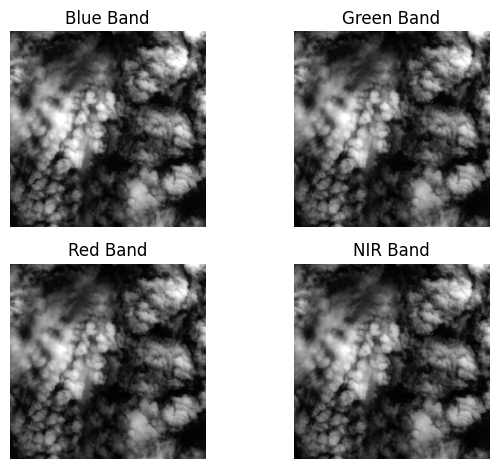

In [8]:
# Set the random seed for numpy
# np.random.seed(seed_value)

ims = get_S2('test')[0][np.random.randint(len(images))]

fig, axes = plt.subplots(2, 2)

# Set the titles for each subplot
titles = ['Blue Band', 'Green Band', 'Red Band', 'NIR Band']

for i, ax in enumerate(axes.flat):
    ax.imshow(ims[:,:,i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()


We have at our disposal images of size 512x512 pixels with 4 channels (RGB + NIR). We can visualize them as follows:

In [9]:
np.random.seed(seed_value)
idxs = np.random.randint(len(images), size=15)

ims = images[idxs]
ms = masks[idxs]

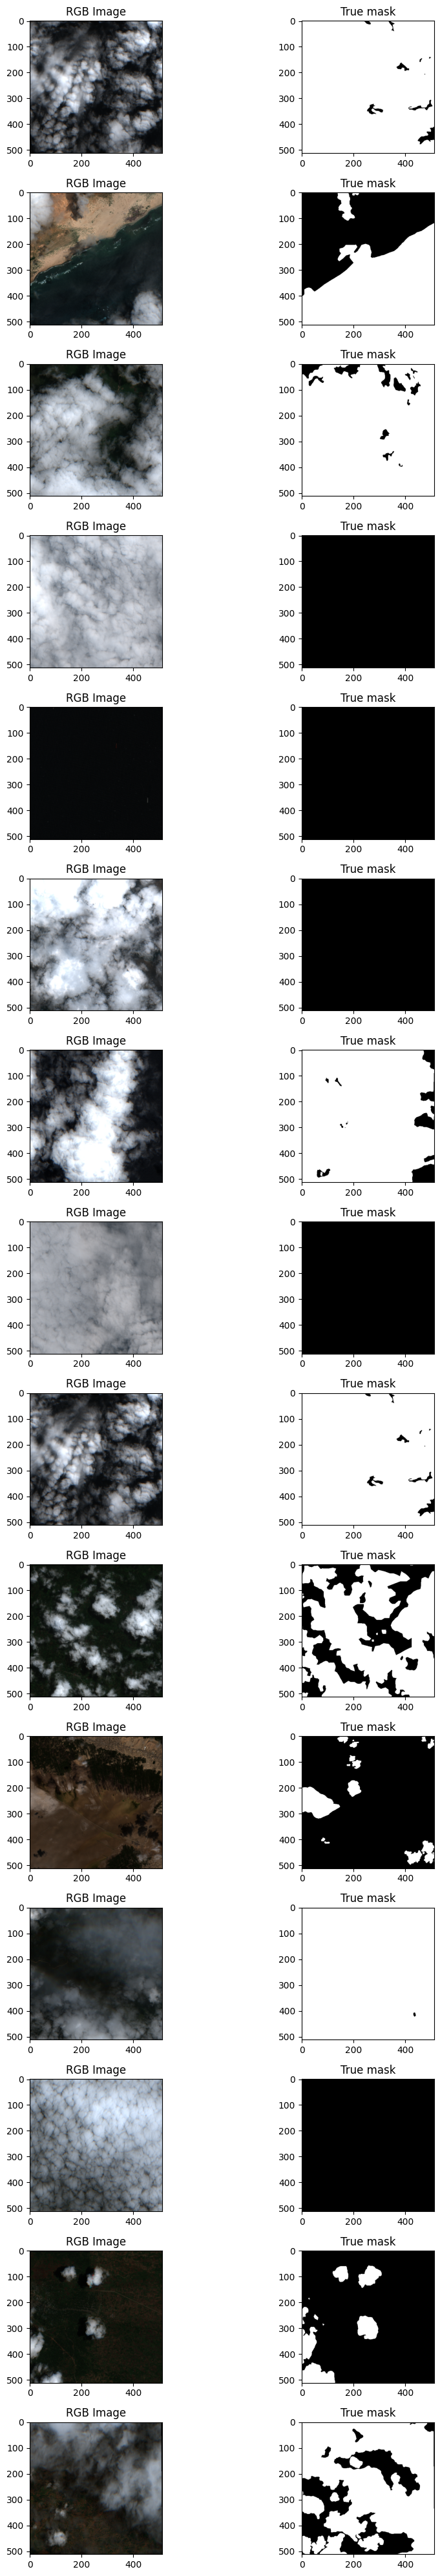

In [10]:
fig, ax = plt.subplots(len(idxs), 2, figsize=(10, 40))

for i in range(len(idxs)):
    ax[i, 0].imshow(ims[i])
    ax[i, 0].set_title('RGB Image')
    ax[i, 1].imshow(ms[i], cmap='gray')
    ax[i, 1].set_title('True mask')

# Adjust the spacing between subplots
plt.tight_layout()

# # Display the figure
plt.show()